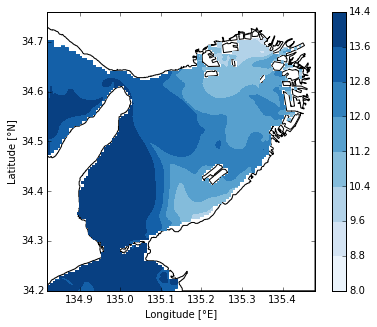

In [11]:
# coding: utf-8
# (c) 2016-02-10 Teruhisa Okada

%matplotlib inline

import netCDF4
import numpy as np
import matplotlib.pyplot as plt

import romspy

inifile = '/home/okada/Data/ob500_ini_param6-ini_20120101.nc'
grdfile = '/home/okada/Data/ob500_grd-11_3.nc'
mapfile = '/home/okada/romspy/romspy/deg_OsakaBayMap_okada.bln'

ini = netCDF4.Dataset(inifile, 'r')
grd = netCDF4.Dataset(grdfile, 'r')

h = grd['h'][:]
cs_r = grd['Cs_r'][:]
x_rho = grd['lon_rho'][0,:]
y_rho = grd['lat_rho'][:,0]
X, Y = np.meshgrid(x_rho, y_rho)

zeta = ini['zeta'][0,:,:]
temp = ini['temp'][0,:,:,:]
N, M, L = temp.shape

depth = np.zeros_like(temp)
for n in range(N):
    depth[n,:,:] = cs_r[n] * (zeta + h)

Z = romspy.zslice(temp, depth, -1)

fig, ax = plt.subplots(1,1,figsize=(6,5))
romspy.basemap(mapfile)
C = ax.contourf(X, Y, Z)
#C.label()
CB = plt.colorbar(C)

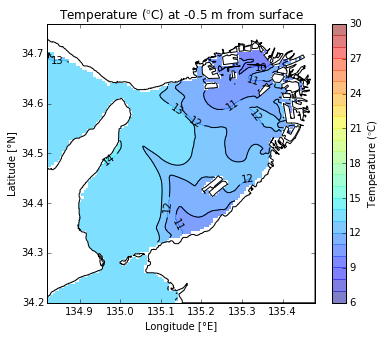

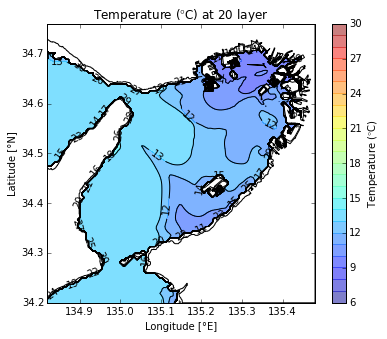

In [68]:
def zview(X, Y, var3d, depth, depth0, contour=True, contourf=True, **kw):
    Z = romspy.zslice(var3d, depth, -1)
    fig, ax = plt.subplots(1,1,figsize=(6,5))
    if contourf:
        alpha = kw.pop('alpha',0.5)
        CF = ax.contourf(X, Y, Z, alpha=alpha, **kw)
        CB = plt.colorbar(CF)
    if contour:
        fmt = kw.pop('fmt', '%i')  # %.1f
        C = ax.contour(X, Y, Z, colors='k', **kw)
        C.clabel(colors='k', fmt=fmt)
    if 'label' in kw.keys():
        label = kw.pop('label')
        CB.ax.set_ylabel(label)
        ax.set_title('{} at {} m from surface'.format(label, depth0))
    else:
        ax.set_title('at {} m from surface'.format(depth0))
    romspy.basemap(mapfile)
    
def sview(X, Y, var3d, k, contour=True, contourf=True, **kw):
    Z = var3d[k,:,:]
    fig, ax = plt.subplots(1,1,figsize=(6,5))
    if contourf:
        alpha = kw.pop('alpha',0.5)
        CF = ax.contourf(X, Y, Z, alpha=alpha, **kw)
        CB = plt.colorbar(CF)
    if contour:
        fmt = kw.pop('fmt', '%i')  # %.1f
        C = ax.contour(X, Y, Z, colors='k', **kw)
        C.clabel(colors='k', fmt=fmt)
    if 'label' in kw.keys():
        label = kw.pop('label')
        CB.ax.set_ylabel(label)
        ax.set_title('{} at {} layer'.format(label, k+1))
    else:
        ax.set_title('at {} layer'.format(k+1))
    romspy.basemap(mapfile)

romspy.cmap('jet')
levels = np.arange(6,31,1)
label = r'Temperature ($\degree$C)'
zview(X, Y, temp, depth, -0.5, levels=levels, label=label)
sview(X, Y, temp, k=19, levels=levels, label=label)